# <center> Descriptive Statistics with Python <center>
<center> Feb 28, 2024 <center>
<center> Zander Bonnet <center>
    
# Link: https://www.loom.com/share/4ea7751dddf94c828cb6741dc1115c53?sid=1f8872cd-c5b9-491f-8a60-025d3be92810

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

1) Outlier Identification and Handling: In this task, you will work with a real-world dataset to identify and handle outliers. Choose a dataset (e.g., from Kaggle, UCI Machine Learning Repository) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, that exhibits outliers or extreme values. Write a Python script that identifies and handles the outliers using at least two methods (e.g., z-score, interquartile range). Use visualization techniques to demonstrate the impact of the outliers on measures of central tendency and variability.

In [2]:
fire = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/top_20_CA_wildfires.csv')
fire

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
7,Matilija,Undetermined,September,1932,Ventura,220000,0,0
8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2


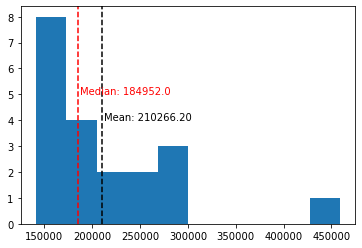

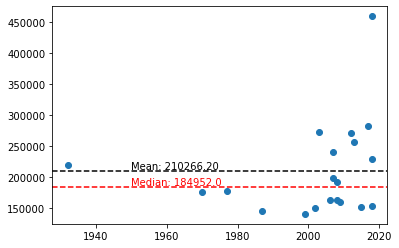

In [3]:
# Make histogram
plt.hist(fire['acres'])
plt.axvline(fire['acres'].mean(), color = 'black', linestyle = 'dashed')
plt.text(fire['acres'].mean() * 1.01, 4, 'Mean: {:.2f}'.format(fire['acres'].mean()))

plt.axvline(np.median(fire['acres']), color = 'red', linestyle = 'dashed')
plt.text(np.median(fire['acres'] * 1.01),5, 'Median: {}'.format(np.median(fire['acres'])), color = 'red')

plt.show()

#Make Scatter Plot
plt.scatter(fire['year'], fire['acres'])
plt.axhline(fire['acres'].mean(), color = 'black', linestyle = 'dashed')
plt.text(1950, fire['acres'].mean() * 1.01,  'Mean: {:.2f}'.format(fire['acres'].mean()))

plt.axhline(np.median(fire['acres']), color = 'red', linestyle = 'dashed')
plt.text(1950,np.median(fire['acres'] * 1.01), 'Median: {}'.format(np.median(fire['acres'])), color = 'red')

plt.show()

#Find standard deviation
sd = np.round(np.std(fire['acres']), 2)

In [4]:
#IQR method to remove outliers
q3 = np.percentile(fire['acres'], 75)
q1 = np.percentile(fire['acres'], 25)
iqr = q3-q1
upthresh = q3 + (1.5*iqr)
botthresh = q1 - (1.5*iqr)
trimiqr = fire[(fire['acres'] < upthresh) & (fire['acres'] > botthresh)]
trimiqr

,fire_name,cause,month,year,county,acres,structures,deaths
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
7,Matilija,Undetermined,September,1932,Ventura,220000,0,0
8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2
10,Marble Cone,Lightning,July,1977,Monterey,177866,0,0


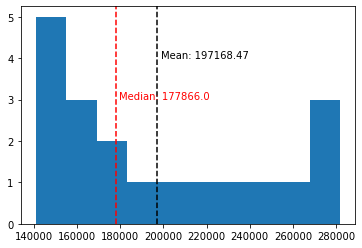

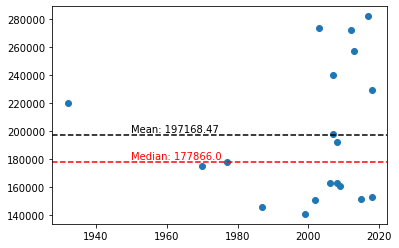

In [5]:
#Make Histogram
plt.hist(trimiqr['acres'])
plt.axvline(trimiqr['acres'].mean(), color = 'black', linestyle = 'dashed')
plt.text(trimiqr['acres'].mean() * 1.01, 4, 'Mean: {:.2f}'.format(trimiqr['acres'].mean()))

plt.axvline(np.median(trimiqr['acres']), color = 'red', linestyle = 'dashed')
plt.text(np.median(trimiqr['acres'] * 1.01),3, 'Median: {}'.format(np.median(trimiqr['acres'])), color = 'red')

plt.show()

#Make Scatter Plot
plt.scatter(trimiqr['year'], trimiqr['acres'])
plt.axhline(trimiqr['acres'].mean(), color = 'black', linestyle = 'dashed')
plt.text(1950, trimiqr['acres'].mean() * 1.01,  'Mean: {:.2f}'.format(trimiqr['acres'].mean()))

plt.axhline(np.median(trimiqr['acres']), color = 'red', linestyle = 'dashed')
plt.text(1950,np.median(trimiqr['acres'] * 1.01), 'Median: {}'.format(np.median(trimiqr['acres'])), color = 'red')

plt.show()

#Find Standard Deviation
sdiqr = np.round(np.std(trimiqr['acres']), 2)

In [6]:
#Z-Score method to remove outliers
zs = np.abs(stats.zscore(fire['acres']))
out_ind = np.where(zs > 3)[0]
trimzs = fire.drop(out_ind)
trimzs

,fire_name,cause,month,year,county,acres,structures,deaths
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
7,Matilija,Undetermined,September,1932,Ventura,220000,0,0
8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2
10,Marble Cone,Lightning,July,1977,Monterey,177866,0,0


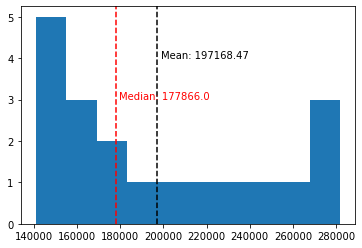

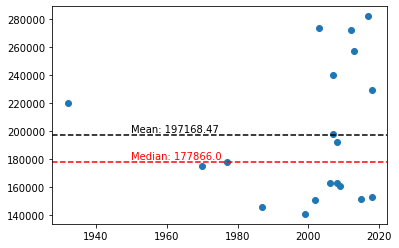

In [7]:
#Make histogram
plt.hist(trimzs['acres'])
plt.axvline(trimzs['acres'].mean(), color = 'black', linestyle = 'dashed')
plt.text(trimzs['acres'].mean() * 1.01, 4, 'Mean: {:.2f}'.format(trimzs['acres'].mean()))

plt.axvline(np.median(trimzs['acres']), color = 'red', linestyle = 'dashed')
plt.text(np.median(trimzs['acres'] * 1.01),3, 'Median: {}'.format(np.median(trimzs['acres'])), color = 'red')

plt.show()

#make scatter plot
plt.scatter(trimzs['year'], trimzs['acres'])
plt.axhline(trimzs['acres'].mean(), color = 'black', linestyle = 'dashed')
plt.text(1950, trimzs['acres'].mean() * 1.01,  'Mean: {:.2f}'.format(trimzs['acres'].mean()))

plt.axhline(np.median(trimzs['acres']), color = 'red', linestyle = 'dashed')
plt.text(1950,np.median(trimzs['acres'] * 1.01), 'Median: {}'.format(np.median(trimzs['acres'])), color = 'red')

plt.show()

#find standard deviation
sdzs = np.round(np.std(trimzs['acres']), 2)

In [8]:
#Show change in standard deviation
sdframe = pd.DataFrame({'Original': sd, 'IQR': sdiqr, 'Z-Score': sdzs}, index = ['SD'])
sdframe

,Original,IQR,Z-Score
SD,73247.82,47080.95,47080.95


2) Bias and Confounding Variables Identification: Identify potential sources of bias or confounding variables in the dataset selected in Task 1 above and discuss how they might impact the analysis.

The potential bias of this dataset is that it only contains the top 20 largest fires in California based on acerage. So if we were to try and run analysis on other factors we would be biased towards large fires. There is also a possible location bias as this data only looks as California fires, so we could not generalize this data to other parts of the world.

There are possible confounding variables in the data set such as population and building densities in the location and time of the fires when trying to analyze the deaths and structures variables.

3) Handling Missing Data: Develop and justify an appropriate statistical method to handle missing data in the dataset selected in Task 1.

In [9]:
#Picks 3 random acres to become a missing value
firena = fire.copy()
ran = random.choices(range(0,20), k = 3)
for x in ran:
    firena.loc[x, 'acres'] = np.nan
firena

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",NaN,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893.0,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246.0,2820,15
3,Rush,Lightning,August,2012,Lassen,271911.0,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314.0,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207.0,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",NaN,1614,8
7,Matilija,Undetermined,September,1932,Ventura,220000.0,0,0
8,Witch,Powerlines,October,2007,San Diego,197990.0,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038.0,0,2


In this case using the interpolate method to fill missing values would be benificical becasue our data is already sorted by acres, so using the linear method would fill values accuratly. This method assumes there is an equal distance between points and picks the midpoint to fill the missing value

In [10]:
firena['acres'].interpolate(method= 'linear', inplace = True, limit_direction = 'both')
firena

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",281893.0,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893.0,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246.0,2820,15
3,Rush,Lightning,August,2012,Lassen,271911.0,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314.0,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207.0,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",230103.5,1614,8
7,Matilija,Undetermined,September,1932,Ventura,220000.0,0,0
8,Witch,Powerlines,October,2007,San Diego,197990.0,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038.0,0,2


In [11]:
#Picks 3 random acres to become a missing value
firena = fire.copy()
ran = random.choices(range(0,20), k = 3)
for x in ran:
    firena.loc[x, 'acres'] = np.nan
firena

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123.0,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893.0,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246.0,2820,15
3,Rush,Lightning,August,2012,Lassen,271911.0,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314.0,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207.0,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651.0,1614,8
7,Matilija,Undetermined,September,1932,Ventura,NaN,0,0
8,Witch,Powerlines,October,2007,San Diego,197990.0,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038.0,0,2


If the missing values were not sorted I would use mean inputation to fill the values. If I had more data in the dataset I might have elected to use a regression model to fill in the missing values.

In [12]:
firena.fillna(firena['acres'].mean())

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123.000000,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893.000000,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246.000000,2820,15
3,Rush,Lightning,August,2012,Lassen,271911.000000,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314.000000,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207.000000,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651.000000,1614,8
7,Matilija,Undetermined,September,1932,Ventura,215833.529412,0,0
8,Witch,Powerlines,October,2007,San Diego,197990.000000,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038.000000,0,2


4) Analysis of Mean and Median Values: In this task, you will analyze a dataset to understand the difference between mean and median values. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, where the mean and median values differ significantly. Write a Python script to calculate and visualize the mean and median values of the dataset. Interpret the results and provide insights into what the difference means for the dataset. Propose solutions to handle this discrepancy and implement them using Python.
Compare and contrast the effectiveness of four different measures of central tendency and variability in capturing the characteristics of the data.

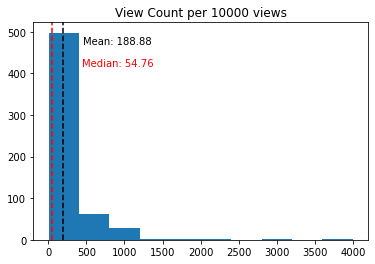

In [13]:
vids = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/most_watched_600_youtube_videos_2024.csv')
#makes histogram
plt.hist(vids['view_count']/10000)
plmin, plmax = plt.ylim()
plt.title('View Count per 10000 views')
plt.axvline((vids['view_count']/10000).mean(), color = 'black', linestyle = 'dashed')
plt.text((vids['view_count']/10000).mean() * 2.4, plmax *.9, 
         'Mean: {:.2f}'.format((vids['view_count']/10000).mean()))

plt.axvline(np.median(vids['view_count']/10000), color = 'red', linestyle = 'dashed')
plt.text(np.median(vids['view_count']/10000) * 8, plmax *.8, 
         'Median: {:.2f}'.format(np.median(vids['view_count']/10000)), color = 'red')
plt.show()

The plot shows that there is a large right skew of the data. This is shown by how there is a elongated tail to the right of the graph as well as the mean is significanly larger than the median. To handle this problem there are a couple solutions. We could choose to find outliers and remove them, or we could take those outliers and replace their values with existing values. These possible values could be the mean, median, mode, largest nonoutlier value if it is a large outlier, or replace with the smallest nonoutlier value if it is a small outlier.

I chose to replace the upper outliers with the largest nonoutlier value as this will still preserve the shape of the data, and it will bring the mean and variance down. If I were to have removed the outliers it would have shrunk my dataset by about 100 values, so I thought it would be more benifical to keep them in the dataset.

In [14]:
x#uses iqr to replace outlier values with max nonoutlier
q1 = np.percentile(vids['view_count'],25)
q3 = np.percentile(vids['view_count'],75)
iqr = q3-q1
up_thresh = q3 + (3*iqr)
low_thresh = q1 - (3*iqr)
rep = vids[(vids['view_count'] > low_thresh) & (vids['view_count'] < up_thresh)].reset_index()
rep['view_count'].max()
trim = vids.copy()
trim.loc[trim['view_count'] > rep['view_count'].max(), 'view_count'] = rep['view_count'].max()
trim

,title,published_at,duration,view_count,like_count,comment_count
0,Se Libró del ATAQUE de un Cocodrilo ❌🐊,2024-01-27T19:16:13Z,PT25S,1849258,1143891.0,8254.0
1,#Sareedrapping#pregnancydrapping#babyshower#sh...,2024-02-11T14:43:07Z,PT37S,1849258,1239925.0,2823.0
2,Majburi Insaan Se Kuch Bhi Karva Deti Hai | PA...,2024-01-24T05:17:00Z,PT1M1S,1849258,938530.0,691.0
3,Tom 🍓 Jerry (Soumya&Ammu)Real End Twist😍🎈 #sho...,2024-01-17T14:14:43Z,PT58S,1849258,438667.0,241.0
4,The success of people depends on their life co...,2024-01-24T09:00:30Z,PT56S,1849258,348898.0,1500.0
...,...,...,...,...,...,...
593,కేసీఆర్ ఏం చేయబోతున్నడు..ముందే చెప్పేసిన మల్లన...,2024-02-20T06:23:10Z,PT7M14S,109855,1969.0,257.0
594,The BEST feeling in the World!! I know I’ll mi...,2024-02-19T18:12:55Z,PT7S,54557,4659.0,132.0
595,Chinese burger with chicken and bamboo shoots ...,2024-02-20T03:16:24Z,PT59S,63345,7631.0,110.0
596,"АЛЁНА, БЛИН про Ксению Собчак и Дину Саеву / ...",2024-02-19T20:04:58Z,PT58S,52786,1549.0,33.0


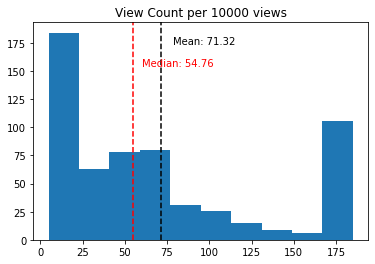

In [15]:
#makes histogram
plt.hist(trim['view_count']/10000)
plmin, plmax = plt.ylim()
plt.title('View Count per 10000 views')
plt.axvline((trim['view_count']/10000).mean(), color = 'black', linestyle = 'dashed')
plt.text((trim['view_count']/10000).mean() * 1.1, plmax *.9, 
         'Mean: {:.2f}'.format((trim['view_count']/10000).mean()))

plt.axvline(np.median(trim['view_count']/10000), color = 'red', linestyle = 'dashed')
plt.text(np.median(trim['view_count']/10000) * 1.1, plmax *.8, 
         'Median: {:.2f}'.format(np.median(trim['view_count']/10000)), color = "red")
plt.show()

In [16]:
print('Mean: {:.2f}'.format(trim['view_count'].mean()))
print('Std: {:.2f}'.format(np.std(trim['view_count'])))
print('Median: {}'.format(np.median(trim['view_count'])))
print('Mode: {}'.format(stats.mode(trim['view_count'])))

Mean: 713211.02
Std: 614205.55
Median: 547645.0
Mode: ModeResult(mode=array([1849258]), count=array([101]))


The most effective way to utilze the mean and median is to comapare them to analyze the skew in the data. From this we can see any possible shift depending on what way the mean leans. If the mean is shifted to the right from the median we can see that there is a right skew and if its to the left there is a left skew. Another effective meassure is the standard deviation/varriance, these measures allow us to see the spread of the data and know how compact our data points are. If we have lots of data points in a small range adn hen just a couple outside of that range we will see that the standard deviation will be smaller than if they were all spread out. Another measure of tendancy is the mode. In examples like this the mode isn't the most useful as the data is very spread out, but in data sets where there may only be a couple possible values it is very helpful to see the most common result.

5) Data Visualization: In this task, you will use Python to create visualizations that effectively communicate data distribution. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, and create basic plots to visualize the data distribution (e.g., histogram, boxplot). Analyze the plots to gain insights into the data distribution and interpret the results.

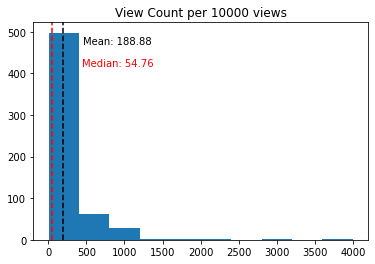

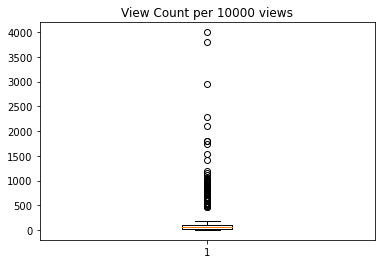

In [17]:
#makes histogram
plt.hist(vids['view_count']/10000)
plmin, plmax = plt.ylim()
plt.title('View Count per 10000 views')
plt.axvline((vids['view_count']/10000).mean(), color = 'black', linestyle = 'dashed')
plt.text((vids['view_count']/10000).mean() * 2.4, plmax *.9, 
         'Mean: {:.2f}'.format((vids['view_count']/10000).mean()))

plt.axvline(np.median(vids['view_count']/10000), color = 'red', linestyle = 'dashed')
plt.text(np.median(vids['view_count']/10000) * 8, plmax *.8, 
         'Median: {:.2f}'.format(np.median(vids['view_count']/10000)), color = 'red')
plt.show()

#makes boxplot
plt.boxplot(vids['view_count']/10000)
plt.title('View Count per 10000 views')
plt.show()

In these plots we can see the skew, frequency, and spread of the data.

The histogram is great at showing the frequency of data. It also shows us any skew in the data. In this example we can see that there is a large skew to the right and there is a much larger concentration of data in the 250 and under bar.

The boxplot is great at showing the spread of the data. It shows us the quantiles and any possible outliers we may have in the data. You can also see skew in this plot by looking at the size of the individal boxes, and where the outliers are located. In this example we can see there are a large amount of possible outliers as well as a very tight spread of nonoutlier values.

6) Measures of Central Tendency and Variability: In this task, you will calculate and interpret measures of central tendency and variability using Python. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources,  and write a Python script to calculate the mean, median, mode, range, variance, and standard deviation of the dataset. Interpret the results and discuss how the measures of central tendency and variability relate to the data distribution.

In [18]:
print('Mean: {:.2f}'.format(fire['acres'].mean()))
print('Median: {}'.format(np.median(fire['acres'])))
print('Mode: {}'.format(stats.mode(fire['acres'])))
print('Range: {}'.format(fire['acres'].max() - fire['acres'].min()))
print('Std: {:.2f}'.format(np.std(fire['acres'])))
print('Var: {:.2f}'.format(np.var(fire['acres'])))

Mean: 210266.20
Median: 184952.0
Mode: ModeResult(mode=array([140948]), count=array([1]))
Range: 318175
Std: 73247.82
Var: 5365242992.96


In our results we can see that the data has a right skew with a fairly large spread. We can see that there is a large std and var in relation to the range so the data must be spread out or there are large outliers. 

The measures of central tendancy and variabilty can show us the possible shape of the data, if there are a large amount of one data point, and how spread out the data is.

7) Data Cleaning: In this task, you will use Python to clean a dataset and prepare it for analysis. Choose a messy dataset (e.g., missing values, inconsistent formatting) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, and write a Python script to clean the dataset. Use appropriate methods to handle missing values, remove duplicates, and convert data types. Visualize the cleaned dataset to demonstrate the impact of the cleaning process.

In [19]:
movies = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/movies.csv')
movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [20]:
movies = movies.dropna().reset_index(drop= True)
movies.drop_duplicates(inplace = True)
movies = movies.convert_dtypes()
#puts years in format to be an int
for x in range(0,len(movies['YEAR'])):
    word = movies.loc[x,'YEAR']
    dig = ''
    for l in word:
        if l.isdigit():
            dig += l
    int(dig)
    movies.loc[x,'YEAR'] = dig
movies['YEAR'] = movies['YEAR'].astype('int64')

#puts votes in format to be an int
for x in range(0,len(movies['VOTES'])):
    word = movies.loc[x,'VOTES']
    dig = ''
    for l in word:
        if l.isdigit():
            dig += l
    int(dig)
    movies.loc[x,'VOTES'] = dig
movies['VOTES'] = movies['VOTES'].astype('int64')

#puts gross in format to be a float
for x in range(0,len(movies['Gross'])):
    movies.loc[x,'Gross'] = movies.loc[x,'Gross'].replace('$','').replace('M', '000000').replace('.','')
movies['Gross'] = movies['Gross'].astype('Float64')

print(movies.dtypes)
movies

MOVIES       string
YEAR          int64
GENRE        string
RATING      Float64
ONE-LINE     string
STARS        string
VOTES         int64
RunTime       Int64
Gross       Float64
dtype: object


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, ...",Director: Patrick Hughes | Stars: Ry...,205979,118,7547000000.0
1,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost...,Director: Steven Spielberg | Stars: ...,897444,127,40245000000.0
2,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a...",Director: Fede Alvarez | Stars: Step...,237601,88,8922000000.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compan...,Director: Peter Jackson | Stars: Eli...,1713028,178,31554000000.0
4,Escape Room,2019,"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of de...,Director: Adam Robitel | Stars: Tayl...,99351,99,5701000000.0
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,2010,Documentary,6.5,Vidal Sassoon is more than just a hairdresser...,Director: Craig Teper | Stars: Bever...,245,90,9000000.0
456,Men at Lunch,2012,"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the i...",Director: Seán Ó Cualáin | Stars: Fi...,331,75,0.0
457,Decoding Deepak,2012,Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tr...",Director: Gotham Chopra | Stars: Dee...,124,83,1000000.0
458,Theo Who Lived,2016,Documentary,6.8,A documentary on American journalist Theo Pad...,Director: David Schisgall | Star: Th...,111,86,1000000.0


In [21]:
#if any 0 or negative values replace with the median of that category
movies.loc[movies['Gross'] <= 0, 'Gross'] = int(movies['Gross'].median())
movies.loc[movies['RATING'] <= 0, 'RATING'] = int(movies['RATING'].median())
movies.loc[movies['VOTES'] <= 0, 'VOTES'] = int(movies['VOTES'].median())
movies.loc[movies['RunTime'] <= 0, 'RunTime'] = int(movies['RunTime'].median())
movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, ...",Director: Patrick Hughes | Stars: Ry...,205979,118,7547000000.0
1,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost...,Director: Steven Spielberg | Stars: ...,897444,127,40245000000.0
2,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a...",Director: Fede Alvarez | Stars: Step...,237601,88,8922000000.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compan...,Director: Peter Jackson | Stars: Eli...,1713028,178,31554000000.0
4,Escape Room,2019,"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of de...,Director: Adam Robitel | Stars: Tayl...,99351,99,5701000000.0
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,2010,Documentary,6.5,Vidal Sassoon is more than just a hairdresser...,Director: Craig Teper | Stars: Bever...,245,90,9000000.0
456,Men at Lunch,2012,"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the i...",Director: Seán Ó Cualáin | Stars: Fi...,331,75,614500000.0
457,Decoding Deepak,2012,Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tr...",Director: Gotham Chopra | Stars: Dee...,124,83,1000000.0
458,Theo Who Lived,2016,Documentary,6.8,A documentary on American journalist Theo Pad...,Director: David Schisgall | Star: Th...,111,86,1000000.0


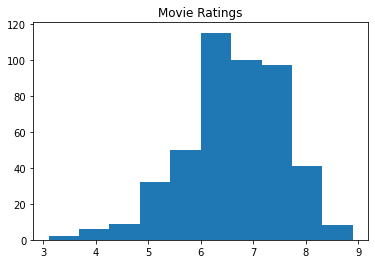

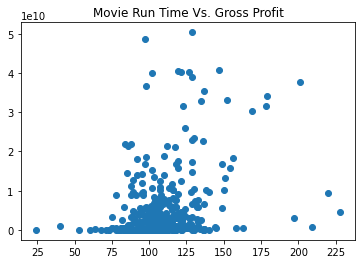

In [22]:
#makes histogram
plt.hist(movies["RATING"])
plt.title('Movie Ratings')
plt.show()
#makes scatter plot
plt.scatter(movies['RunTime'], movies['Gross'])
plt.title('Movie Run Time Vs. Gross Profit')
plt.show()

By cleaning the data we are now able to conduct graphical analysis on the data. Before it thought these values were strings so we would have not been able to plot them. We also droped many missing values so we are able to get an accurate representation of the complete data. As well as we corrected any data that was wrong with a median value of its category.

8) Group Analysis: In this task, you will use Python to conduct group analysis on a dataset. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, and write a Python script to group the data by a categorical variable (e.g., gender, age group). Calculate measures of central tendency and variability for each group and visualize the results using appropriate plots. Interpret the results and discuss any differences between the groups.

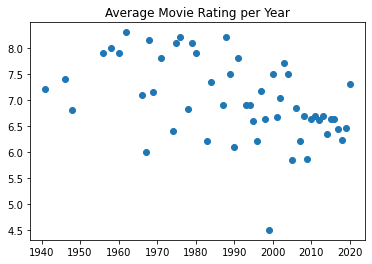

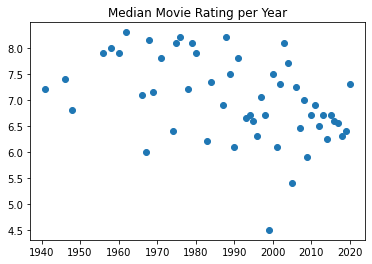

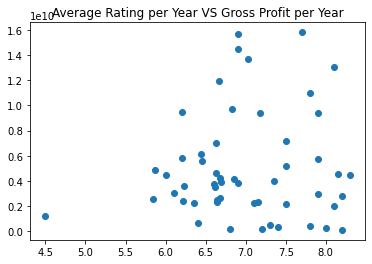

In [23]:
yearmeans = movies.groupby(movies['YEAR']).mean()
yearmed = movies.groupby(movies['YEAR']).median()
yearsd = movies.groupby(movies['YEAR']).agg(np.std)
yearvar = movies.groupby(movies['YEAR']).agg(np.var)
yearmode = movies.groupby(movies['YEAR']).agg(stats.mode)

years = sorted(movies['YEAR'].unique())
#makes scatter plot
plt.scatter(years, yearmeans['RATING'])
plt.title('Average Movie Rating per Year')
plt.show()

#makes scatter plot
plt.scatter(years, yearmed['RATING'])
plt.title('Median Movie Rating per Year')
plt.show()

#makes scatter plot
plt.scatter(yearmeans['RATING'], yearmeans['Gross'])
plt.title('Average Rating per Year VS Gross Profit per Year')
plt.show()

In conducting this analysis we can see differences in values per year across all the numerical data points. We can then use this data to plot and make assumptions about general trends over time. We can see that in the average and median movie ratings the ratings have been trending down since about the 1980's.

References:

Top 20 Largest California Wildfires. (2020).Kaggle [Dataset]. https://www.kaggle.com/datasets/annieichen/top-20-largest-california-wildfires.

2024's Most-Watched YouTube Videos. (2024). Kaggle [Dataset}.
https://www.kaggle.com/datasets/kanchana1990/2024s-most-watched-youtube-videos.

MOVIES DATASET FOR FEATURE EXTRACION ,PREDICTION. (2021).Kaggle [Dataset]. https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?select=movies.csv

Rogel-Salazar, J. (2023). Statistics and Data Visualization with Python. CRC Press.